Note: this notebook is based on the git commit [b1e1de7cdc7856cdbc6b18eb37dcf4d0c67fd1ed](https://github.com/rcap107/benchmark-join-suggestions/commit/b1e1de7cdc7856cdbc6b18eb37dcf4d0c67fd1ed) and should not be used for runs executed 
with later versions of the code as the logging structure was modified.

In [1]:
cd /home/soda/rcappuzz/work/benchmark-join-suggestions

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%autoreload 2
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
import src.utils.plotting as plotting
from src.data_structures.loggers import read_logs

In [4]:
cfg = pl.Config()
cfg.set_fmt_str_lengths(150)

polars.config.Config

# Full base table

In [5]:
# run_name = "0111-s9c28pyn"
run_name = "0109-90whx6jr"
df_raw, df_agg = read_logs(run_name)

df_raw = (
    df_raw.sort("join_strategy")
    .with_columns((pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case"))
    .sort("case")
)

In [6]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"))
)

## Pivot

In [7]:
pivoted = plotting.prepare_pivoted_table(df_raw)
pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3)

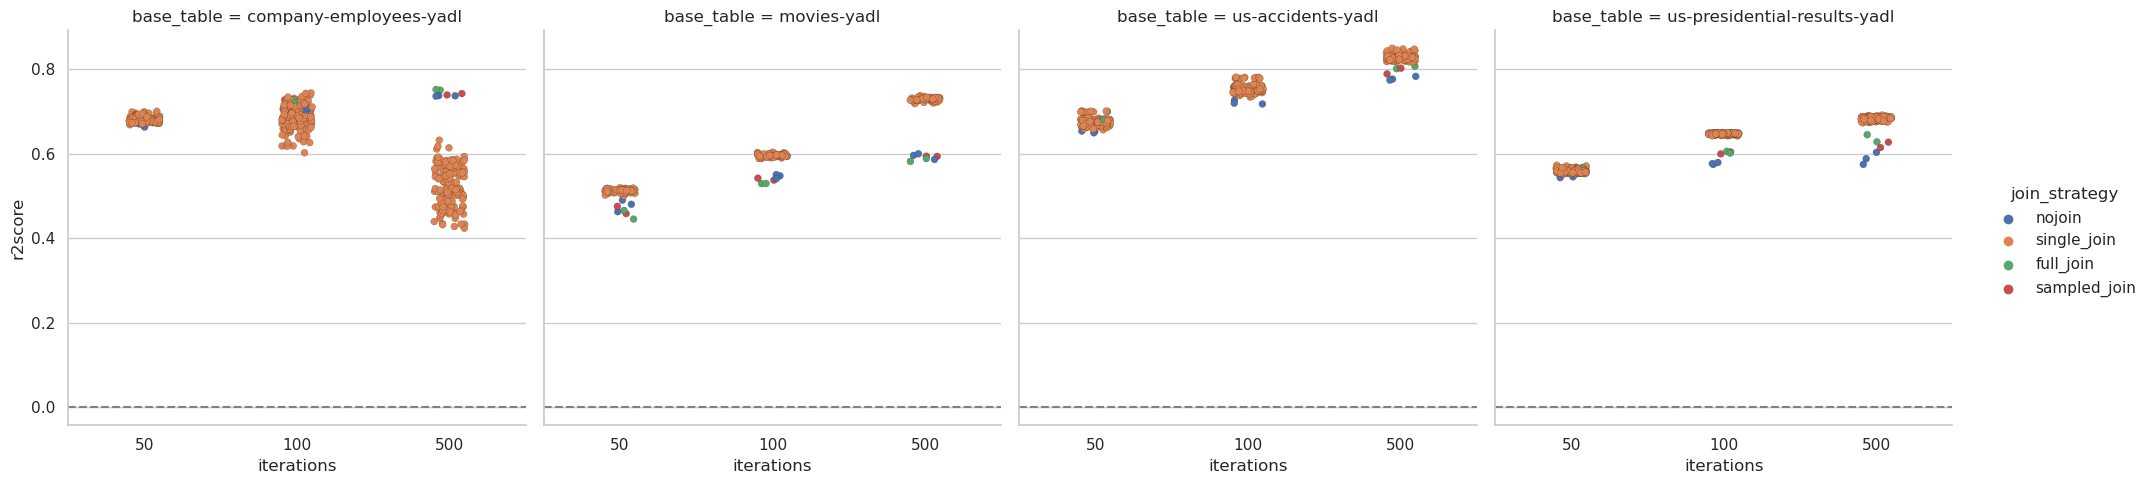

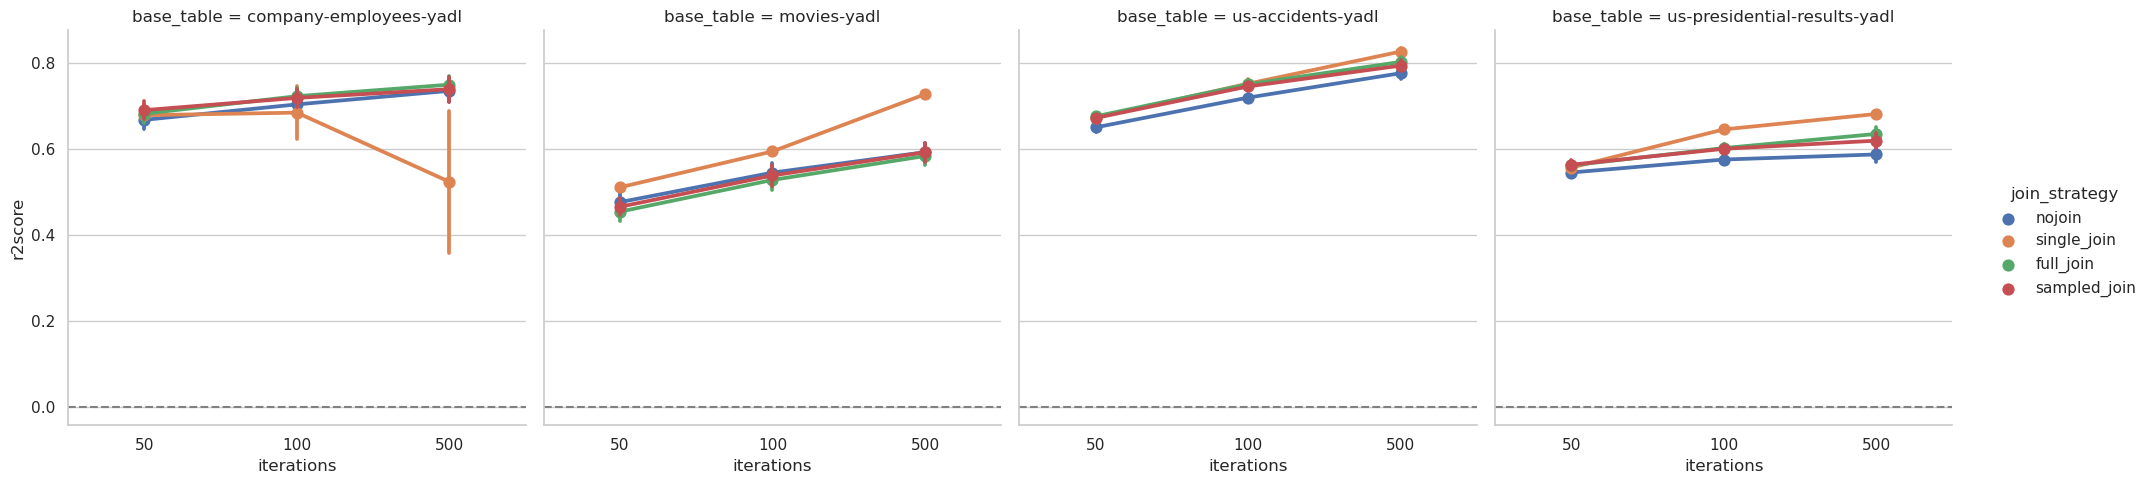

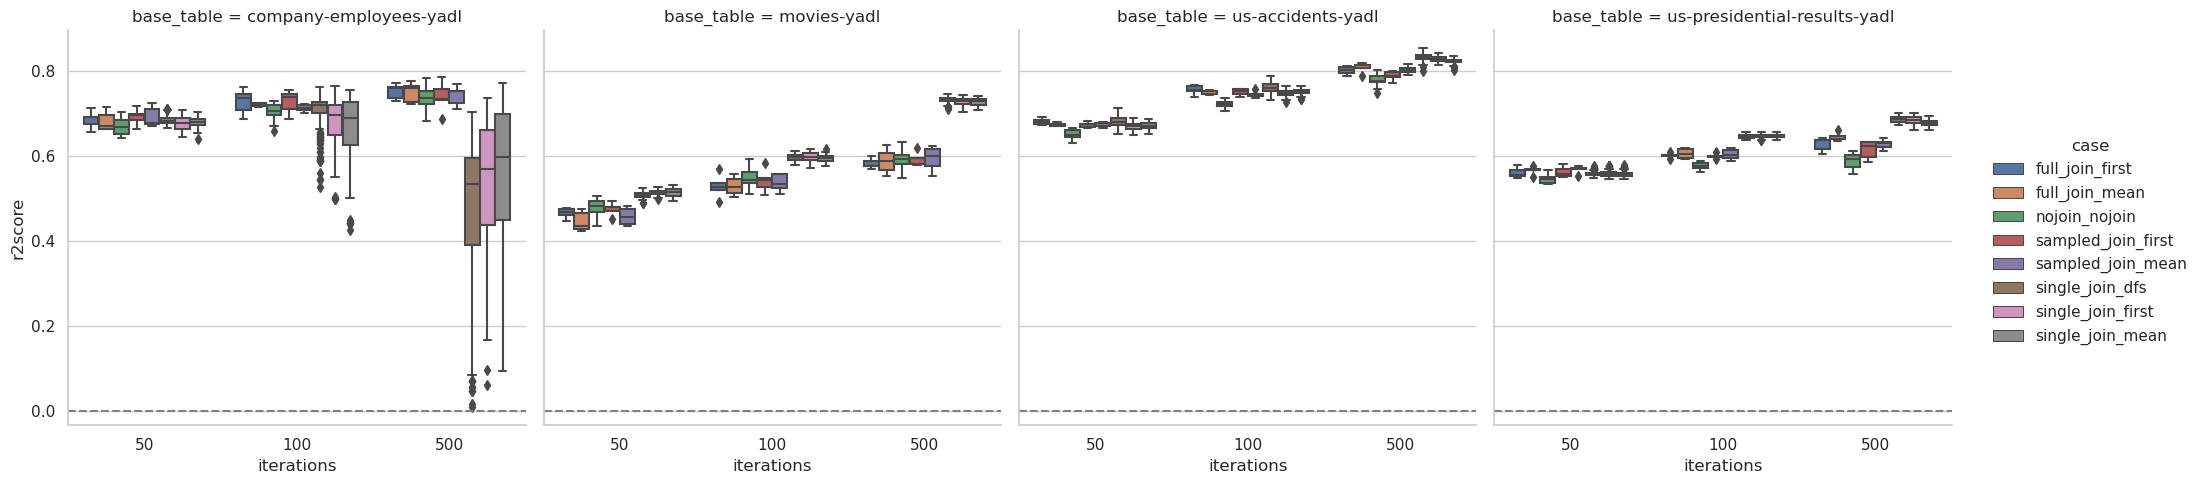

In [10]:
plotting.prepare_plots(df_raw)

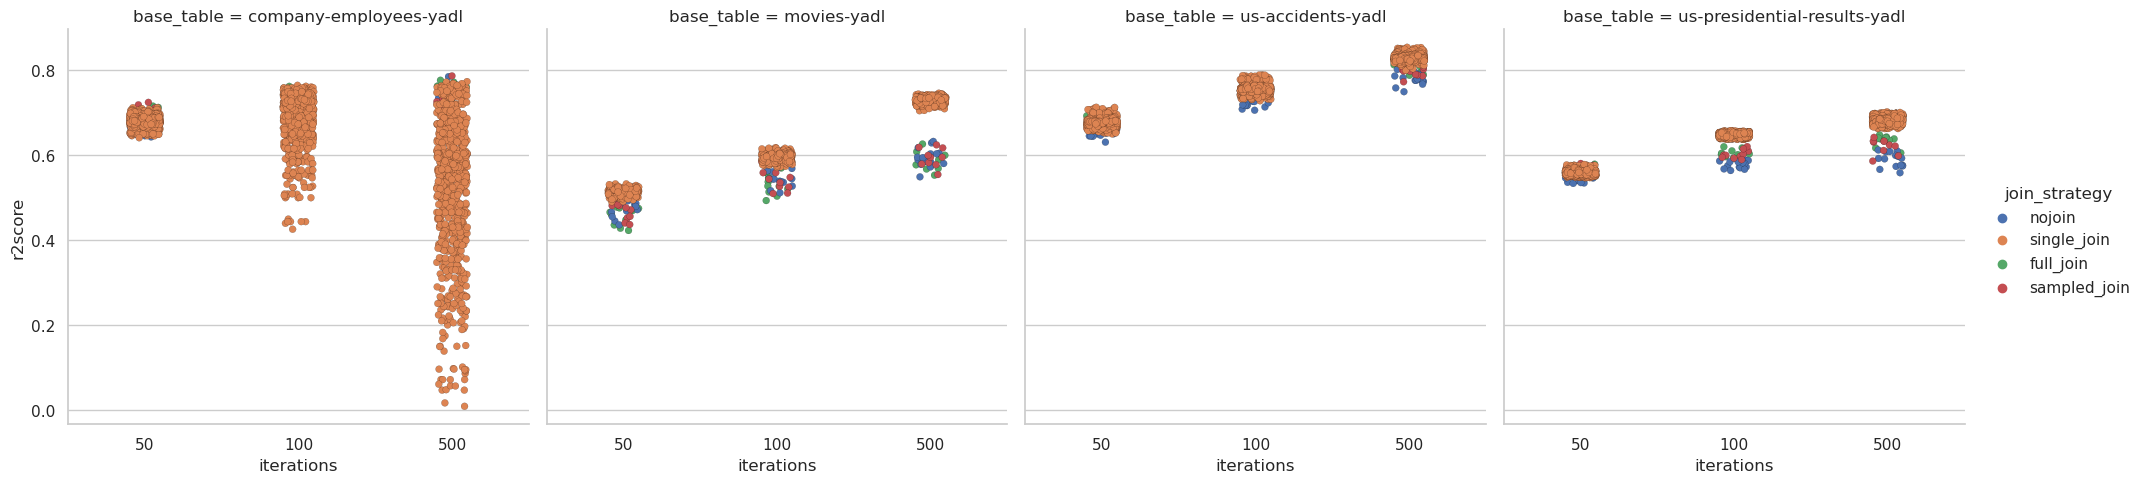

In [11]:
g = sns.catplot(
    data=df_raw.sort("base_table").to_pandas(),
    col="base_table",
    hue="join_strategy",
    y="r2score",
    x="iterations",
    kind="strip",
    hue_order=["nojoin", "single_join", "full_join", "sampled_join"],
    dodge=False,
    edgecolor="black",
    linewidth=0.1
    # palette=colors,
)

# Depleted tables

In [12]:
run_name = "0111-s9c28pyn"
df_raw, df_agg = read_logs(run_name)

df_raw = (
    df_raw.sort("join_strategy")
    .with_columns((pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case"))
    .sort("case")
)

In [13]:
pivoted = plotting.prepare_pivoted_table(df_raw)
pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3)

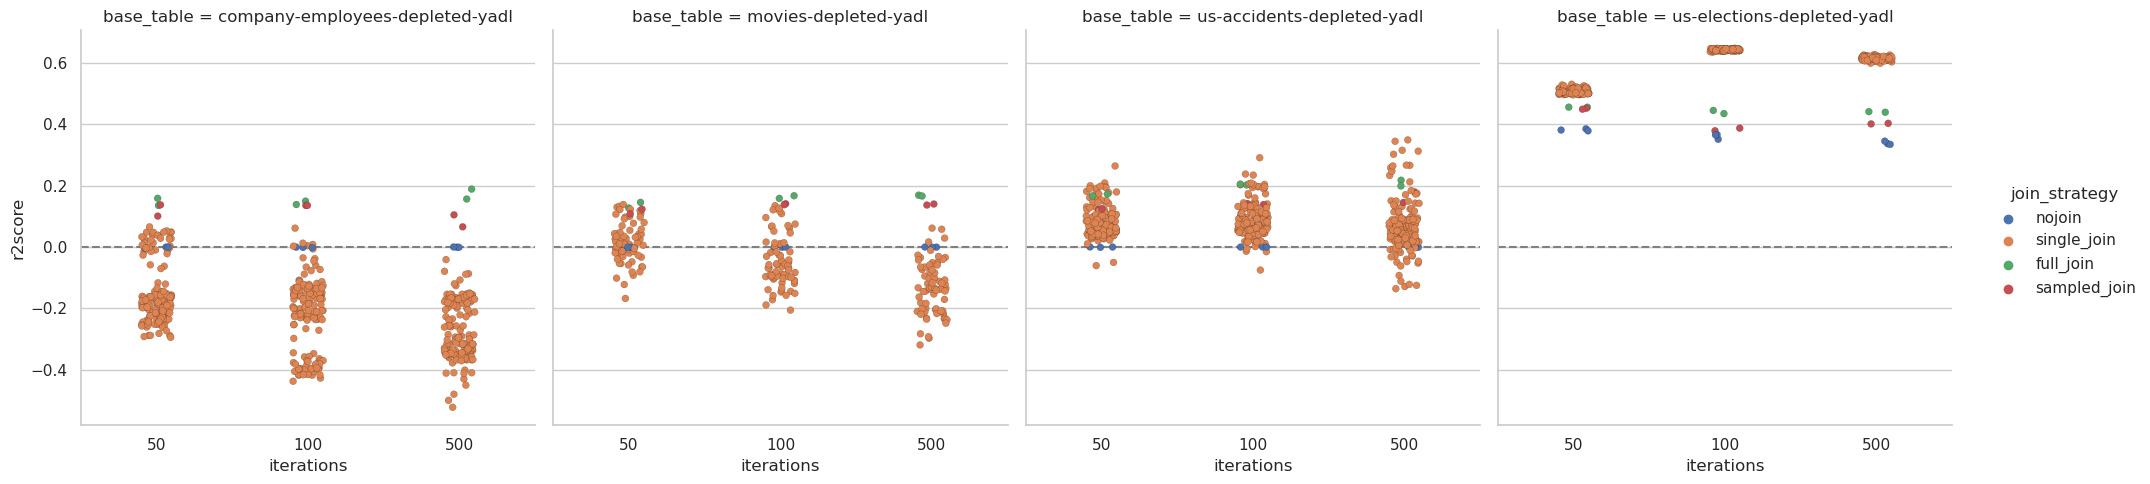

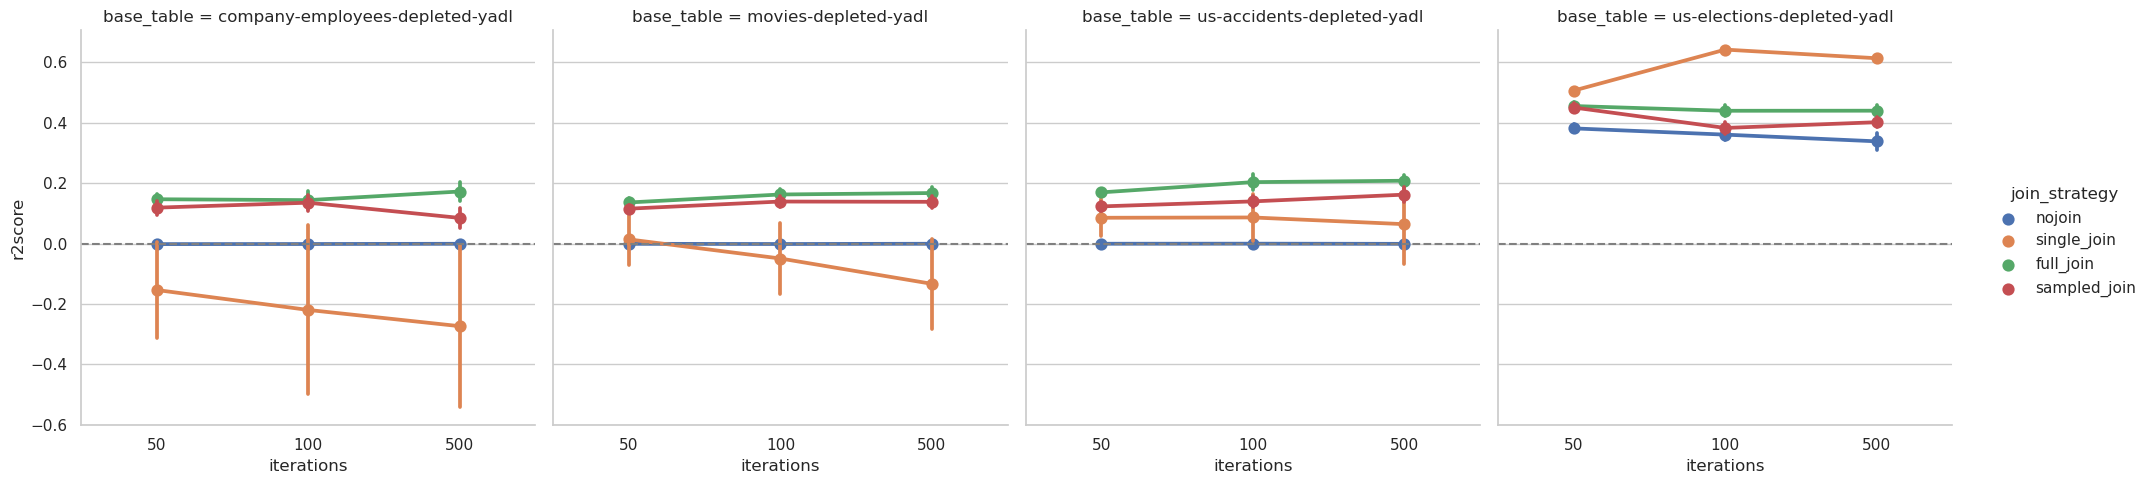

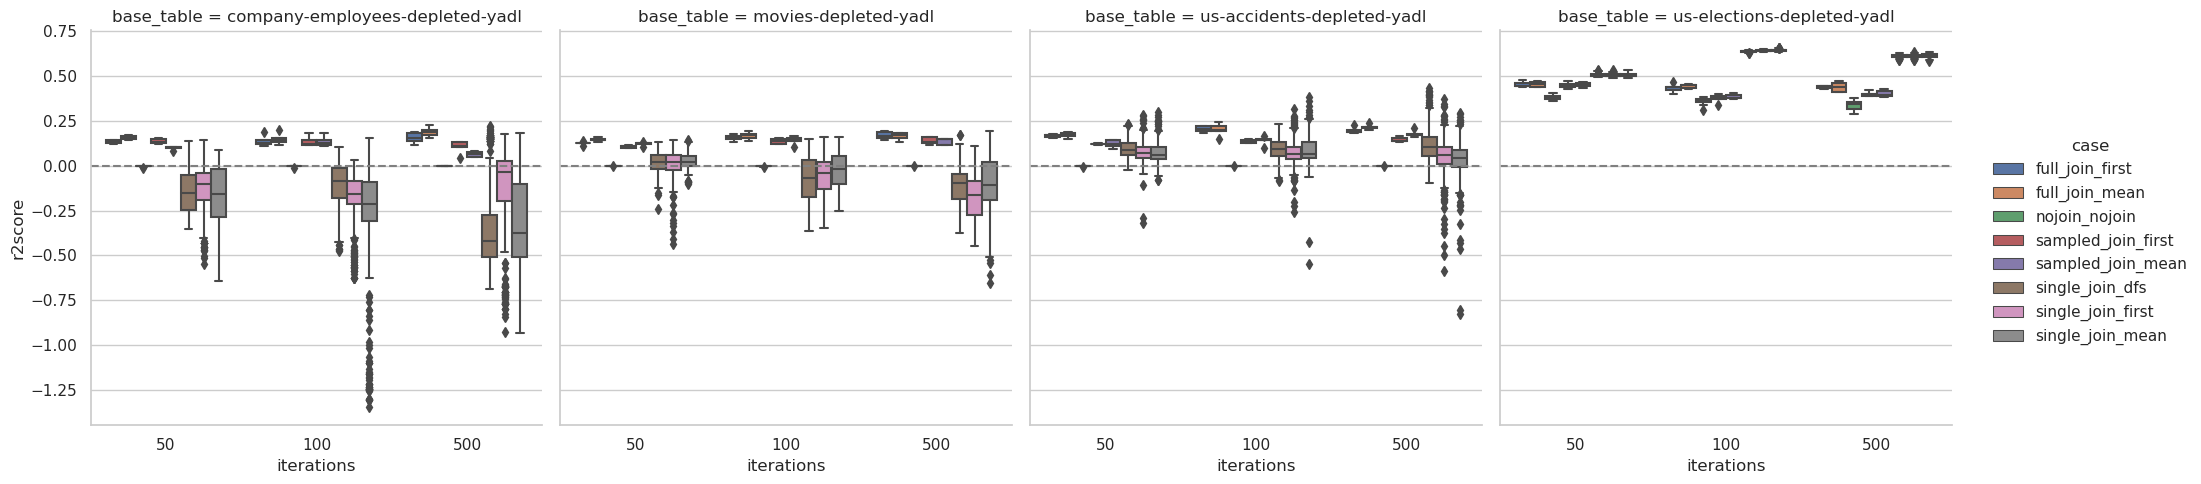

In [14]:
plotting.prepare_plots(df_raw)

In [15]:
df_ = (
    df_raw.with_columns(
        (pl.col("join_strategy") + "_" + pl.col("aggregation")).alias("case")
    )
    .sort("case")
    .groupby(
        pl.col(
            [
                "scenario_id",
                "base_table",
                "candidate_table",
                "case",
                "join_strategy",
                "aggregation",
                "iterations",
            ]
        )
    )
    .agg(pl.mean("r2score"))
)

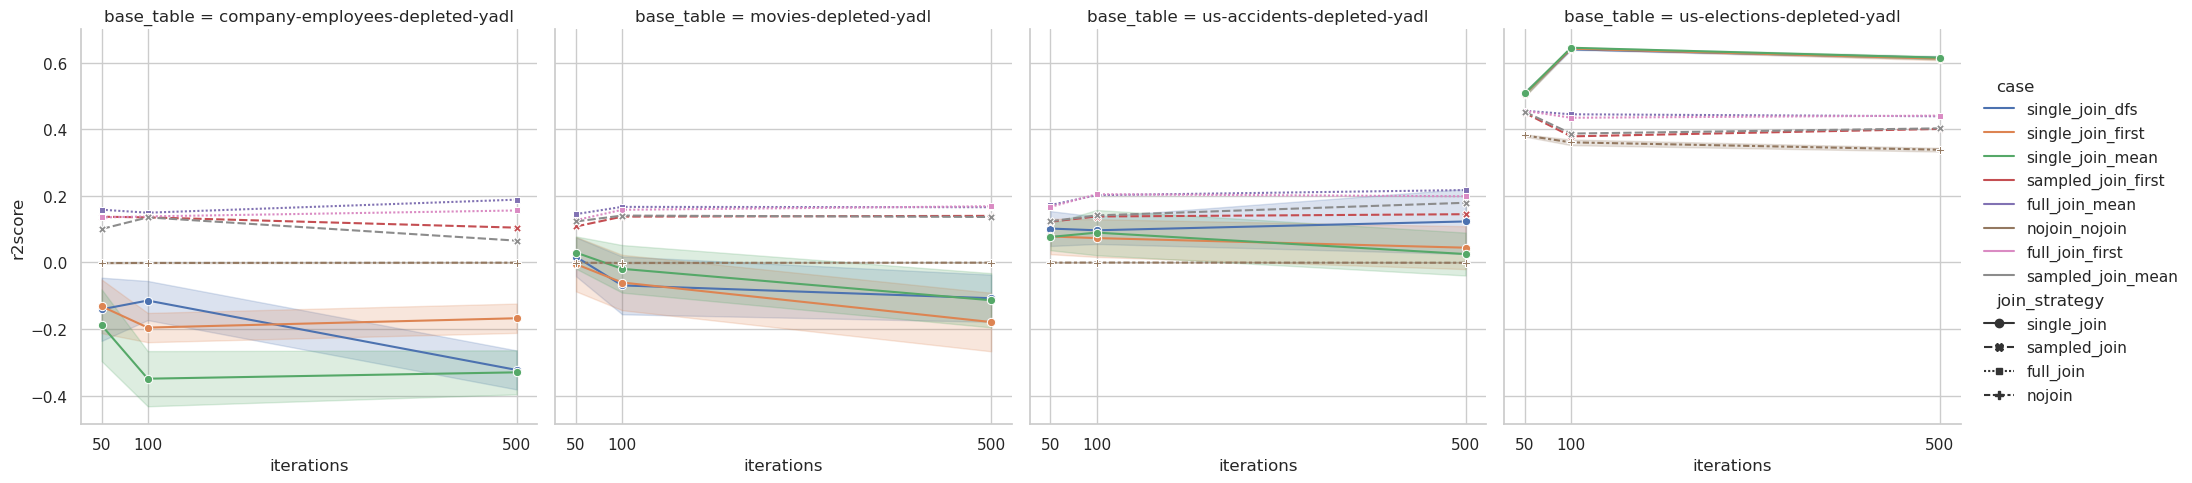

In [16]:
g = sns.relplot(
    data=df_.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="line",
    errorbar="sd",
    style="join_strategy",
    markers=True,
    # palette=colors,
)
for ax in g.axes.flat:
    ax.set_xticks([50, 100, 500])

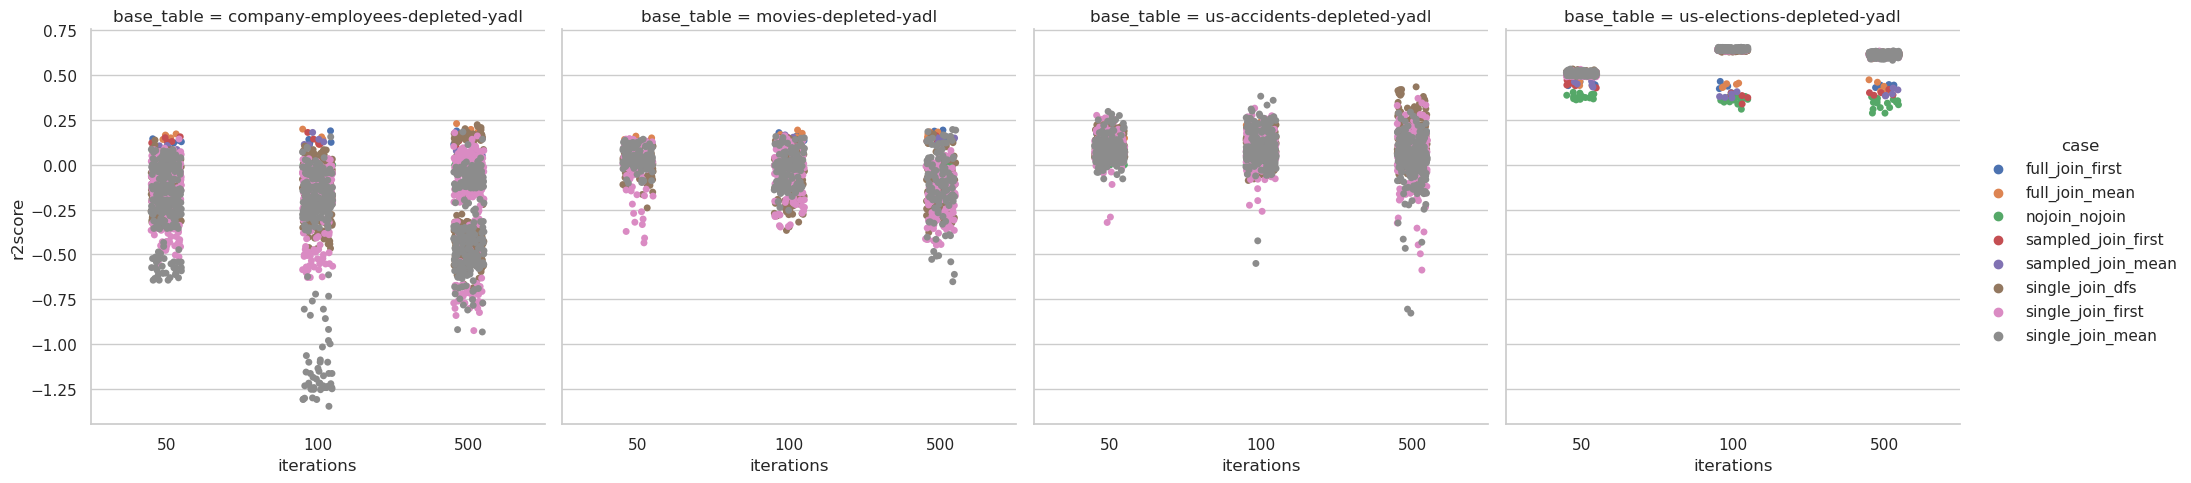

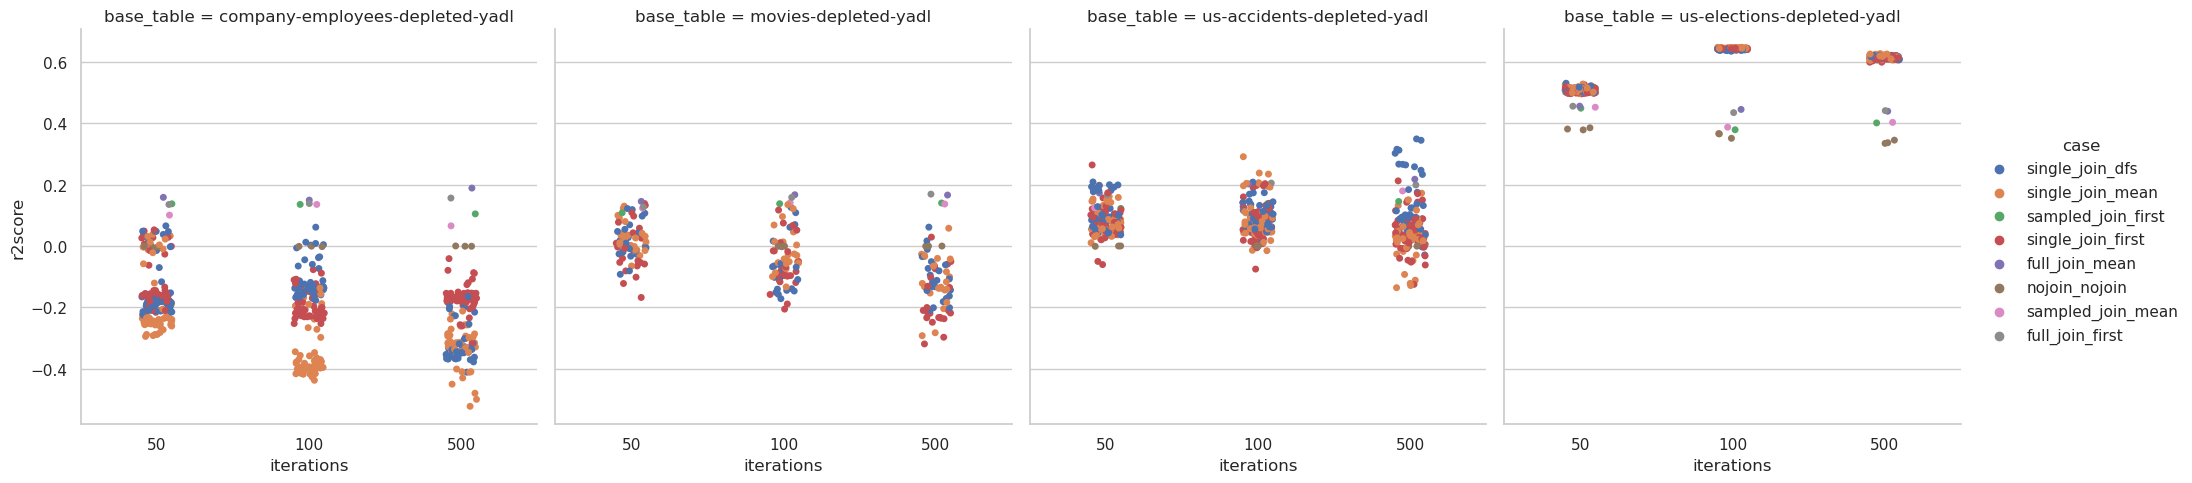

In [17]:
g = sns.catplot(
    data=df_raw.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="strip",
)
g = sns.catplot(
    data=df_.sort("base_table").to_pandas(),
    col="base_table",
    hue="case",
    y="r2score",
    x="iterations",
    kind="strip",
)